<a href="https://colab.research.google.com/github/XimenaLimon/4-methylphthalic-acid-and-its-related-anhydride./blob/main/4_methylphthalic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine learning applied to determine enthalpies of formation, combustion, and sublimation of 4-methylphthalic acid and its related anhydride.**

In [1]:
import pandas as pd
A=pd.read_csv("/content/Combustion.csv")
pd.set_option("display.max_rows",None)

#Use the data set according to the enthalpy to be predicted
#"Combustion.csv", "Sublimation.csv", "Formation_g.csv" or "Formation_cr.csv"

In [2]:
#Definition of variables
x=A.iloc[:,3:]
y=A.iloc[:-1,2]

In [3]:
#Obtaining variables
B=pd.get_dummies(x[["group","Correction 1","Correction 2","Correction 3","Correction 4"]])
#B.head(2)
x=x.drop(["group","Correction 1","Correction 2","Correction 3","Correction 4"],axis=1)
C=pd.concat([x,B],axis=1)
#C.head(2)

In [4]:
#Compounds to predict
Compounds=C.iloc[:-1,:]
isomers=C.iloc[95:,:]

#The number of data depends on the data set of each enthalpy that you want to predict.

#For Enthalpy of combustion use:
     #isomers=C.iloc[95:,:]

#For Enthalpy of sublimation use:
     #isomeros=C.iloc[72:,:]

#For Enthalpy of formation in gas phase use:
     #isomeros=C.iloc[82:,:]

#For Enthalpy of formation in crystalline phase use:
     #isomeros=C.iloc[98:,:]

In [5]:
#Train and Test Split
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [7]:
#Array of random state
r2_train=[]
r2_test=[]
random_state=[]

for state in np.arange(1,1000):
  x_train,x_test,y_train,y_test=train_test_split(Compounds,y,test_size=0.3,random_state=state)
  model=LinearRegression()
  model.fit(x_train,y_train)
  r2_train.append(model.score(x_train,y_train))
  r2_test.append(model.score(x_test,y_test))
  random_state.append(state)

results=pd.DataFrame(data=list(zip(random_state, r2_train,r2_test)), columns=["State", "Train", "Test"])

In [8]:
#Split variables into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Compounds,y,test_size=0.3,random_state=865)

#Multiple Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.9999904866859393
0.9997245313749403


##MLR Training phase

In [10]:
#Model predictions in the training phase
y_pred_train=model.predict(x_train)

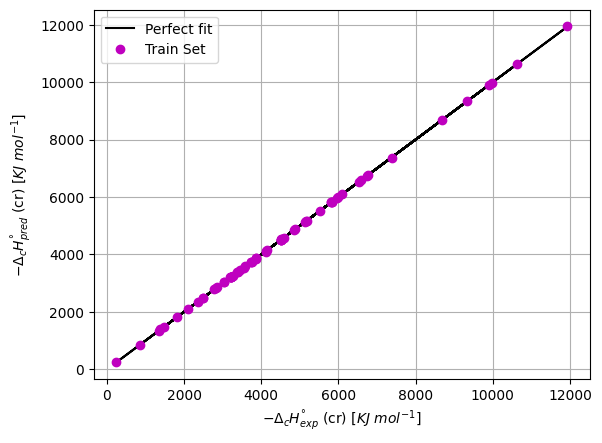

In [11]:
#Parity diagram
import matplotlib.pyplot as plt
plt.style.use('default')
plt.plot(y_train,y_train, "k-", label="Perfect fit")
plt.plot(y_train, y_pred_train, "mo", label="Train Set")
plt.xlabel("$-\Delta_{c}H^{°}_{exp}$ (cr) $[KJ\ mol^{-1}$]")
plt.ylabel("$-\Delta_{c}H^{°}_{pred}$ (cr) $[KJ\ mol^{-1}$]")
plt.grid()
plt.legend(loc="best")
plt.show()

In [12]:
#Evaluation Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("The R2 of the training set is : {}".format(r2_score(y_train,y_pred_train)))
print("The MAE of the training set is : {}".format(mean_absolute_error(y_train,y_pred_train).round(4)))
print("The RMSE of the training set is : {}".format(mean_squared_error(y_train,y_pred_train, squared=False).round(4)))

The R2 of the training set is : 0.9999904866859393
The MAE of the training set is : 3.2048
The RMSE of the training set is : 7.0975


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##MLR Test phase

In [13]:
#Model predictions in the test phase
y_pred_test=model.predict(x_test)

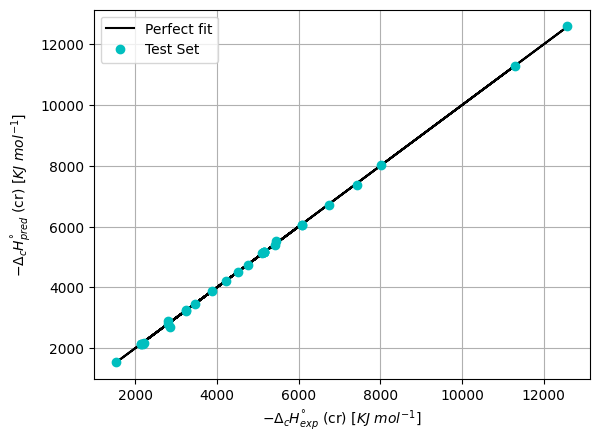

In [14]:
#Parity diagram
plt.style.use('default')
plt.plot(y_test,y_test, "k-", label="Perfect fit")
plt.plot(y_test, y_pred_test, "co", label="Test Set")
plt.xlabel("$-\Delta_{c}H^{°}_{exp}$ (cr) $[KJ\ mol^{-1}$]")
plt.ylabel("$-\Delta_{c}H^{°}_{pred}$ (cr) $[KJ\ mol^{-1}$]")
plt.grid()
plt.legend(loc="best")
plt.show()

In [15]:
#Evaluation Metrics
print("The R2 of the test set is : {}".format(r2_score(y_test,y_pred_test)))
print("The MAE of the test set is : {}".format(mean_absolute_error(y_test,y_pred_test).round(4)))
print("The RMSE of the test set is : {}".format(mean_squared_error(y_test,y_pred_test, squared=False).round(4)))

The R2 of the test set is : 0.9997245313749403
The MAE of the test set is : 25.2434
The RMSE of the test set is : 42.0424


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##Benson stock update with MLR

In [16]:
Benson=pd.DataFrame(data=list(zip(Compounds, (model.coef_).round(2))), columns=["Group", "Value"])
model.intercept_.round(2)

24.86

#Support Vector Regression

In [17]:
from sklearn.svm import SVR

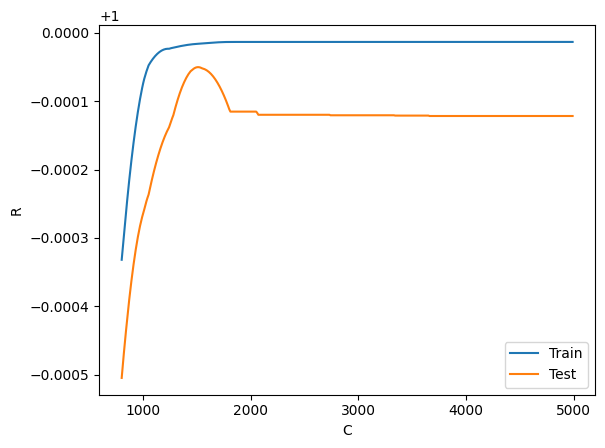

In [18]:
#Hyperparameter C
C=[]
R2_train=[]
R2_test=[]
for i in np.arange(800,5000,10):
  model_svr=SVR(kernel="linear", C=i).fit(x_train,y_train)
  R2_train.append(model_svr.score(x_train,y_train))
  R2_test.append(model_svr.score(x_test,y_test))
  C.append(i)

plt.plot(C,R2_train, label="Train")
plt.plot(C,R2_test, label="Test")
plt.legend(loc="best")
plt.xlabel("C")
plt.ylabel("R")
plt.show()

In [19]:
model_svr=SVR(kernel="linear",C=2000)
model_svr.fit(x_train,y_train)
print(model_svr.score(x_train,y_train))
print(model_svr.score(x_test,y_test))

0.9999866513963314
0.999884707475286


##SVR Training phase

In [20]:
y_pred_svr_train=model_svr.predict(x_train)

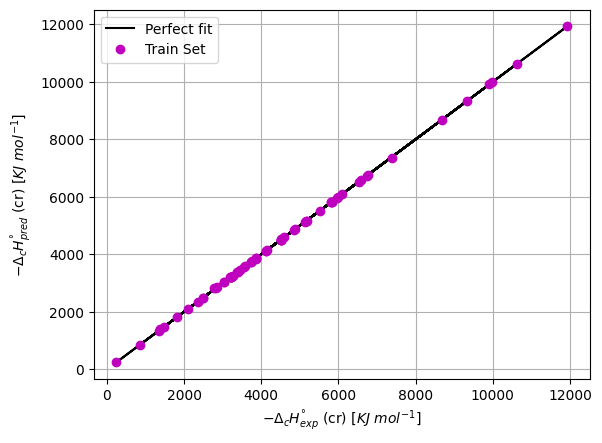

In [21]:
#Parity diagram
plt.style.use('default')
plt.plot(y_train,y_train, "k-", label="Perfect fit")
plt.plot(y_train, y_pred_svr_train, "mo", label="Train Set")
plt.xlabel("$-\Delta_{c}H^{°}_{exp}$ (cr) $[KJ\ mol^{-1}$]")
plt.ylabel("$-\Delta_{c}H^{°}_{pred}$ (cr) $[KJ\ mol^{-1}$]")
plt.grid()
plt.legend(loc="best")
plt.show()

In [22]:
#Evaluation Metrics
print("The R2 of the training set is : {}".format(r2_score(y_train,y_pred_svr_train)))
print("The MAE of the training set is : {}".format(mean_absolute_error(y_train,y_pred_svr_train).round(4)))
print("The RMSE of the training set is : {}".format(mean_squared_error(y_train,y_pred_svr_train, squared=False).round(4)))

The R2 of the training set is : 0.9999866513963314
The MAE of the training set is : 2.4888
The RMSE of the training set is : 8.4073


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##SVR Test phase

In [23]:
#Model predictions in the test phase
y_pred_svr_test=model_svr.predict(x_test)

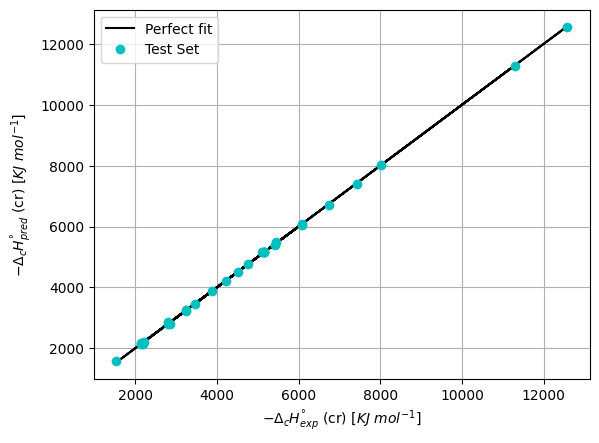

In [24]:
#Parity diagram
plt.style.use('default')
plt.plot(y_test,y_test, "k-", label="Perfect fit")
plt.plot(y_test, y_pred_svr_test, "co", label="Test Set")
plt.xlabel("$-\Delta_{c}H^{°}_{exp}$ (cr) $[KJ\ mol^{-1}$]")
plt.ylabel("$-\Delta_{c}H^{°}_{pred}$ (cr) $[KJ\ mol^{-1}$]")
plt.grid()
plt.legend(loc="best")
plt.show()

In [25]:
#Evaluation Metrics
print("The R2 of the test set is : {}".format(r2_score(y_test,y_pred_svr_test)))
print("The MAE of the test set is : {}".format(mean_absolute_error(y_test,y_pred_svr_test).round(4)))
print("The RMSE of the test set is : {}".format(mean_squared_error(y_test,y_pred_svr_test, squared=False).round(4)))

The R2 of the test set is : 0.999884707475286
The MAE of the test set is : 20.1182
The RMSE of the test set is : 27.1989


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##Benson stock update with MLR

In [26]:
Benson_svr=pd.DataFrame(data=list(zip(Compounds, (model_svr.coef_[0]).round(2))), columns=["Group", "Value"])
model_svr.intercept_.round(2)

array([69.56])

#Predictions result

In [27]:
#MLR
y_compounds=model.predict(isomers)
print(y_compounds.round(2))

[3862.65 3895.29]


In [28]:
#SVR
y_compounds_svr=model_svr.predict(isomers)
print(y_compounds_svr.round(2))

[3865.16 3892.98]
